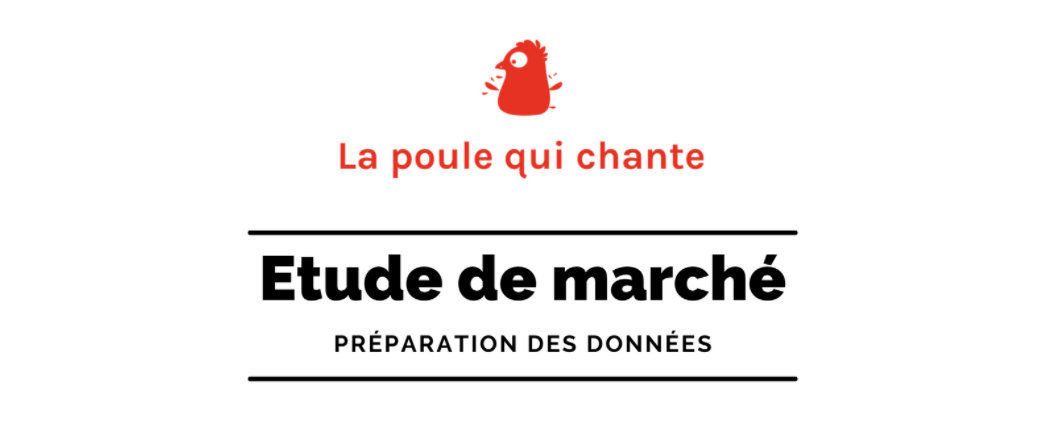


La poule qui chante est une entreprise française d'agroalimentaire. Elle souhaite se développer à l'international. Pour réaliser une étude de marché visant à cibler des pays potentiels, nous importons des données sur l'alimentaiton mondiale à partir de l'organisation FAO.

Les données nettoyées et traitées permettrons de déterminer les indicateurs clés. Ces derniers premettrons d'avoir une vue globale de la situation et de prendre les décisions stratégiques.

**Sommaire :**

- [Mise en place de l'environnement](#Mise-en-place-de-l'environnement)
    - [Importation des librairies](#Importation-des-librairies)
    - [Constantes et configuration](#Constantes-et-configuration)
    - [Fonctions](#Fonctions)
- [Importation des données](#Importation-des-données)
    - [Population](#Population)
    - [Indicateurs Pays](#Indicateurs-Pays)
    - [Bilan alimentaire](#Indicateurs-Pays)
    
- [Préparation des données](#Bilan-Alimentaire)
    - [Création du dataset](#Création-du-Dataset)
        - [Country code](#Country-code)
        - [Calculate data](#Calculate-data)
    - [Néttoyage des données](#Néttoyage-des-données)
        - [Cohérence taille population](#Cohérence-taille-population)
        - [Valeurs doublons](#Valeurs-doublons)
- [Export des données](#Export-des-données-tratées-au-format-csv)

# Mise en place de l'environnement <a class="anchor" id="chapter1"></a>

## Importation des librairies

In [1]:
import pandas as pd
import os, sys

import warnings 
warnings.filterwarnings("ignore")

## Constantes et configuration

In [2]:
# path to data folder
DATA_PATH = os.path.realpath('') + '/data/'

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.options.display.float_format = '{:,.2f}'.format

## Fonctions

In [3]:
def import_csv_to_dataframe(filename):
    try:
        return pd.read_csv(DATA_PATH + filename, encoding='utf8')
    except Exception as e:
        print(">>> Le fichier {} est introuvable.".format(filename))
        sys.exit(e)

def check_duplicates(dataframe):
    """
    Get dataframe duplicates count.
    
    args:
        dataframe: pandas dataframe
    """
    
    duplicate_count = len(dataframe) - len(dataframe.drop_duplicates())
    print(f"""{duplicate_count} doublons.""")

def is_unique(dataframe, column):
    """
    Check if values of column are unique key
    
    args:
        dataframe: pandas dataframe
        column: column name to check
    """
    if column not in dataframe.columns:
        raise ValueError("'{}' n'est pas une colonne de la dataframe".format(column))
    
    duplicate_count = len(dataframe) - len(dataframe.drop_duplicates(subset=column))
    
    if duplicate_count == 0:
        print(f"""{column} : possède des valeurs uniques.""")
    else:
        print(f"""Pas de valeurs uniques : {duplicate_count} doublons.""")

---
# Importation des données

**Choix des variables :**

Régime alimentaire :
- Disponibilité alimentaire par habitant
- Disponibilité en poulet par habitant
- Quantité de poulet consommée
- Quantité de poulet produit et importée par les pays

Population et pouvoir d'achat
- Evolution de la population
- PIB / Habitant
- Stabilité politique des pays

## Population

On recupère les données sur le nombre d'habitants par pays sur 5 ans. On pourra calculer le taux de croissance de la taille de la population par pays.

In [4]:
annual_population = import_csv_to_dataframe("AnnualPopulation.csv")
annual_population.head(5)

,Domain,Area,Element,Item,Year,Unit,Value
0,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,2013,1000 persons,"32,269.59"
1,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,2018,1000 persons,"37,171.92"
2,Annual population,Albania,Total Population - Both sexes,Population - Est. & Proj.,2013,1000 persons,"2,903.79"
3,Annual population,Albania,Total Population - Both sexes,Population - Est. & Proj.,2018,1000 persons,"2,882.74"
4,Annual population,Algeria,Total Population - Both sexes,Population - Est. & Proj.,2013,1000 persons,"38,140.13"


In [5]:
annual_population.replace('Total Population - Both sexes', 'total_pop', inplace=True)
annual_population.replace('Population - Est. & Proj.', 'pop_est', inplace=True)
annual_population['Value'] = annual_population['Value'] * 1000
annual_population.drop("Unit", axis=1, inplace=True)

In [6]:
annual_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   474 non-null    object 
 1   Area     474 non-null    object 
 2   Element  474 non-null    object 
 3   Item     474 non-null    object 
 4   Year     474 non-null    int64  
 5   Value    474 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 22.3+ KB


In [7]:
len(annual_population['Area'].unique())

237

> Il y a 237 pays référencés. Les données ne présentent pas de valeurs manquantes.

## Indicateurs Pays

On récupére ici des données sur le PIB et la stabilité politique des pays.

In [8]:
food_security = import_csv_to_dataframe("FoodSecurity.csv")
food_security.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Suite of Food Security Indicators,Afghanistan,Value,"Gross domestic product per capita, PPP, dissem...",2013,I$,"2,116.50"
1,Suite of Food Security Indicators,Afghanistan,Value,"Gross domestic product per capita, PPP, dissem...",2018,I$,"2,033.80"
2,Suite of Food Security Indicators,Afghanistan,Value,Political stability and absence of violence/te...,2013,index,-2.52
3,Suite of Food Security Indicators,Afghanistan,Value,Political stability and absence of violence/te...,2018,index,-2.75
4,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy requirement (kcal/cap/day),2013,kcal/capita/day,"2,097.00"


In [9]:
food_security.replace(
    'Suite of Food Security Indicators',
    'ssi', inplace=True)
food_security.replace(
    'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
    'gross_domestic_PPP', inplace=True)
food_security.replace(
    'Political stability and absence of violence/terrorism (index)',
    'political_stability', inplace=True)
food_security.replace(
    'Average dietary energy requirement (kcal/cap/day)',
    'energy_required', inplace=True)

food_security.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,ssi,Afghanistan,Value,gross_domestic_PPP,2013,I$,"2,116.50"
1,ssi,Afghanistan,Value,gross_domestic_PPP,2018,I$,"2,033.80"
2,ssi,Afghanistan,Value,political_stability,2013,index,-2.52
3,ssi,Afghanistan,Value,political_stability,2018,index,-2.75
4,ssi,Afghanistan,Value,energy_required,2013,kcal/capita/day,"2,097.00"


In [10]:
food_security.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   1156 non-null   object 
 1   Area     1156 non-null   object 
 2   Element  1156 non-null   object 
 3   Item     1156 non-null   object 
 4   Year     1156 non-null   int64  
 5   Unit     1156 non-null   object 
 6   Value    1156 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 63.3+ KB


Il n'y a pas de valeurs manquantes.

## Bilan Alimentaire

Les données alimentaires nous permettrons de définir le besoin alimentaire de chaque pays et leurs consommation.

In [11]:
food_balance = import_csv_to_dataframe("FoodBalance.csv")
food_balance.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Food Balances (2014-),Afghanistan,Food supply (kcal/capita/day),Grand Total,2018,kcal/capita/day,"2,040.00"
1,Food Balances (2014-),Afghanistan,Protein supply quantity (g/capita/day),Grand Total,2018,g/capita/day,55.52
2,Food Balances (2014-),Afghanistan,Food supply (kcal/capita/day),Vegetal Products,2018,kcal/capita/day,"1,849.00"
3,Food Balances (2014-),Afghanistan,Protein supply quantity (g/capita/day),Vegetal Products,2018,g/capita/day,44.73
4,Food Balances (2014-),Afghanistan,Food supply (kcal/capita/day),Animal Products,2018,kcal/capita/day,191.00


**Select Items :**

Liste des items disponibles :

In [12]:
food_balance['Item'].unique()

array(['Grand Total', 'Vegetal Products', 'Animal Products',
       'Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat',
       'Meat, Other'], dtype=object)

Sélection des items :

In [13]:
food_item_select = ['Grand Total', 'Vegetal Products', 'Animal Products', 'Poultry Meat']
food_balance = food_balance[food_balance['Item'].isin(food_item_select)]

Variables disponibles :

In [14]:
food_balance['Element'].unique()

array(['Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Export Quantity', 'Domestic supply quantity'],
      dtype=object)

In [15]:
food_balance.replace(
    'Food supply (kcal/capita/day)',
    'food_supply_kcal_capita_day', inplace=True)
food_balance.replace(
    'Protein supply quantity (g/capita/day)',
    'protein_supply_g_capita_day', inplace=True)

**Valeurs manquantes :**

In [16]:
food_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 5930
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   2039 non-null   object 
 1   Area     2039 non-null   object 
 2   Element  2039 non-null   object 
 3   Item     2039 non-null   object 
 4   Year     2039 non-null   int64  
 5   Unit     2039 non-null   object 
 6   Value    2039 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 127.4+ KB


Il n'y a pas de valeurs manquantes.

## Distance France

Les distances entre les pays et la France est un critère intéressant dans nos importations.

In [17]:
distances_from_france = import_csv_to_dataframe("DistancesFrance.csv")
distances_from_france.head()

,Country Code,Area,Distance from France (km)
0,AFG,Afghanistan,"5,594.22"
1,ALB,Albania,"1,603.94"
2,DZA,Algeria,"1,345.46"
3,ASM,American Samoa,"16,117.70"
4,AND,Andorra,708.21


In [18]:
distances_from_france.columns = ['country_code', 'area', 'dist_from_FRA']
distances_from_france.drop("area", axis=1, inplace=True)

In [19]:
distances_from_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   232 non-null    object 
 1   dist_from_FRA  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


Il n'y a pas de valeurs manquantes.

# Préparation des données

**Concaténation de l'ensemble des données population, sécurité et disponibilités alimentaires :**

In [20]:
df_temp = pd.concat([annual_population, food_security, food_balance])
df_temp.head()

,Domain,Area,Element,Item,Year,Value,Unit
0,Annual population,Afghanistan,total_pop,pop_est,2013,"32,269,589.00",NaN
1,Annual population,Afghanistan,total_pop,pop_est,2018,"37,171,921.00",NaN
2,Annual population,Albania,total_pop,pop_est,2013,"2,903,790.00",NaN
3,Annual population,Albania,total_pop,pop_est,2018,"2,882,740.00",NaN
4,Annual population,Algeria,total_pop,pop_est,2013,"38,140,133.00",NaN


**Pivot du dataframe :**

In [21]:
df_temp = df_temp.pivot_table(index='Area', values='Value', columns=['Element', 'Item', 'Year']).reset_index()
df_temp.head()

Element            Area Domestic supply quantity Export Quantity  \
Item                                Poultry Meat    Poultry Meat   
Year                                        2018            2018   
0           Afghanistan                    53.00            0.00   
1               Albania                    27.00             NaN   
2               Algeria                   295.00             NaN   
3        American Samoa                      NaN             NaN   
4               Andorra                      NaN             NaN   

Element Import Quantity   Production           Value           \
Item       Poultry Meat Poultry Meat energy_required            
Year               2018         2018            2013     2018   
0                 25.00        29.00        2,097.00 2,142.00   
1                 12.00        16.00        2,494.00 2,488.00   
2                  0.00       295.00        2,313.00 2,284.00   
3                   NaN          NaN             NaN      NaN   
4                   NaN          NaN             NaN      NaN   

Element                                                         \
Item    gross_domestic_PPP           political_stability         
Year                  2013      2018                2013  2018   
0                 2,116.50  2,033.80               -2.52 -2.75   
1                11,361.30 13,323.80                0.09  0.38   
2                11,319.10 11,642.20               -1.20 -0.83   
3                      NaN       NaN                0.93  1.20   
4                      NaN       NaN                1.28  1.42   

Element food_supply_kcal_capita_day                                            \
Item                Animal Products Grand Total Poultry Meat Vegetal Products   
Year                           2018        2018         2018             2018   
0                            191.00    2,040.00         5.00         1,849.00   
1                          1,003.00    3,360.00        50.00         2,357.00   
2                            390.00    3,322.00        24.00         2,932.00   
3                               NaN         NaN          NaN              NaN   
4                               NaN         NaN          NaN              NaN   

Element protein_supply_g_capita_day                                            \
Item                Animal Products Grand Total Poultry Meat Vegetal Products   
Year                           2018        2018         2018             2018   
0                             10.79       55.52         0.51            44.73   
1                             61.75      115.74         3.52            54.00   
2                             24.73       91.83         2.12            67.10   
3                               NaN         NaN          NaN              NaN   
4                               NaN         NaN          NaN              NaN   

Element     total_pop                
Item          pop_est                
Year             2013          2018  
0       32,269,589.00 37,171,921.00  
1        2,903,790.00  2,882,740.00  
2       38,140,133.00 42,228,408.00  
3           55,713.00     55,465.00  
4           80,774.00     77,006.00

## Création du Dataset

### Country code

On intègre les codes pays pour une meilleure visibilité dans les analyses.

In [22]:
df_country_code = import_csv_to_dataframe("CountryCode.csv")
df_country_code = df_country_code[['Country', 'ISO3 Code']]
df_country_code.columns = ['area', 'country_code']

### Calculate data

In [23]:
data = pd.DataFrame()

# Country name and code
data['area'] = df_temp['Area']
data = data.merge(df_country_code, how='left', on='area')

# Population
data['population'] = df_temp['total_pop']['pop_est'][2018]
data['pop_evo'] = (df_temp['total_pop']['pop_est'][2018] - df_temp['total_pop']['pop_est'][2013]) / df_temp['total_pop']['pop_est'][2013] *100

# Transactions
data['chicken_prod'] = df_temp['Production'] * 1000 * 1000
data['chicken_prod'] = data['chicken_prod'] / data['population']
data['chicken_import_quantity'] = df_temp['Import Quantity'] * 1000 * 1000
data['chicken_import_quantity'] = data['chicken_import_quantity'] / data['population']
#data['export_quantity'] = df_temp['Export Quantity']

# Food supply
data['food_supply_kcal'] = df_temp['food_supply_kcal_capita_day']['Grand Total'] * 365
data['food_supply_protein'] = df_temp['protein_supply_g_capita_day']['Grand Total'] * 365
data['ratio_animal_protein'] = (df_temp['protein_supply_g_capita_day']['Animal Products'] / df_temp['protein_supply_g_capita_day']['Grand Total']) *365

# Country indicators
data['PIB'] = df_temp['Value']['gross_domestic_PPP'][2018]
data['stability'] = df_temp['Value']['political_stability'][2018]

# Distances from France
data = data.merge(distances_from_france, how='left', on='country_code')

data

,area,country_code,population,pop_evo,chicken_prod,chicken_import_quantity,food_supply_kcal,food_supply_protein,ratio_animal_protein,PIB,stability,dist_from_FRA
0,Afghanistan,AFG,"37,171,921.00",15.19,0.78,0.67,"744,600.00","20,264.80",70.94,"2,033.80",-2.75,"5,594.22"
1,Albania,ALB,"2,882,740.00",-0.72,5.55,4.16,"1,226,400.00","42,245.10",194.74,"13,323.80",0.38,"1,603.94"
2,Algeria,DZA,"42,228,408.00",10.72,6.99,0.00,"1,212,530.00","33,517.95",98.30,"11,642.20",-0.83,"1,345.46"
3,American Samoa,ASM,"55,465.00",-0.45,NaN,NaN,NaN,NaN,NaN,NaN,1.20,"16,117.70"
4,Andorra,AND,"77,006.00",-4.66,NaN,NaN,NaN,NaN,NaN,NaN,1.42,708.21
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Wallis and Futuna Islands,WLF,"11,661.00",-5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,057.16"
241,Western Sahara,ESH,"567,402.00",12.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,755.81"
242,Yemen,YEM,"28,498,683.00",13.33,6.32,3.37,"786,210.00","19,899.80",69.49,NaN,-2.99,"5,311.61"
243,Zambia,ZMB,"17,351,708.00",16.25,2.82,0.63,"730,730.00","22,093.45",82.61,"3,521.50",0.09,"7,565.18"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     245 non-null    object 
 1   country_code             243 non-null    object 
 2   population               245 non-null    float64
 3   pop_evo                  245 non-null    float64
 4   chicken_prod             179 non-null    float64
 5   chicken_import_quantity  181 non-null    float64
 6   food_supply_kcal         180 non-null    float64
 7   food_supply_protein      180 non-null    float64
 8   ratio_animal_protein     180 non-null    float64
 9   PIB                      195 non-null    float64
 10  stability                205 non-null    float64
 11  dist_from_FRA            221 non-null    float64
dtypes: float64(10), object(2)
memory usage: 24.9+ KB


Les données présentent des données manquantes que l'on va traiter ci-dessous.

## Nettoyage des données

### Cohérence taille population

In [25]:
WEB_WORLD_POP_SIZE_2018 = 7534000000

nb_unique_country_pop = len(data.area.unique())
total_pop_size = data['population'].sum()

print(f"""
Population totale :
- {nb_unique_country_pop} pays
- fichier population : {total_pop_size:,}
- population mondiale communiquée : {WEB_WORLD_POP_SIZE_2018:,}
""")


Population totale :
- 237 pays
- fichier population : 9,419,092,509.0
- population mondiale communiquée : 7,534,000,000



Il y a un différence de taille de population, on va donc chercher les doublons.

In [26]:
df_temp = data[['area', 'country_code', 'population']]

In [27]:
df_temp[df_temp['area'].str.contains('China')]

,area,country_code,population
43,China,CHN,"1,459,377,612.00"
44,"China, Hong Kong SAR",HKG,"7,371,730.00"
45,"China, Macao SAR",MAC,"631,636.00"
46,"China, Taiwan Province of",TWN,"23,726,460.00"
47,"China, mainland",NaN,"1,427,647,786.00"


In [28]:
data = data.drop(data[(data.area == 'China')].index)
data.loc[data.area == "China, mainland", "country_code"] = "CHN"

In [29]:
data[data['area'].str.contains('China')]

,area,country_code,population,pop_evo,chicken_prod,chicken_import_quantity,food_supply_kcal,food_supply_protein,ratio_animal_protein,PIB,stability,dist_from_FRA
44,"China, Hong Kong SAR",HKG,"7,371,730.00",3.99,3.39,111.37,"1,192,455.00","46,913.45",266.77,"61,062.90",0.79,"9,645.86"
45,"China, Macao SAR",MAC,"631,636.00",9.40,6.33,41.16,"1,214,355.00","39,956.55",236.43,"132,417.00",1.26,"9,614.59"
46,"China, Taiwan Province of",TWN,"23,726,460.00",1.30,27.56,9.15,"1,088,795.00","31,463.00",184.53,NaN,0.85,"9,846.95"
47,"China, mainland",CHN,"1,427,647,786.00",2.57,13.59,0.35,"1,170,190.00","37,105.90",145.73,NaN,NaN,NaN


In [30]:
WEB_WORLD_POP_SIZE_2018 = 7534000000

nb_unique_country_pop = len(data.area.unique())
total_pop_size = data['population'].sum()

print(f"""
Population totale :
- {nb_unique_country_pop} pays
- fichier population : {total_pop_size:,}
- population mondiale communiquée : {WEB_WORLD_POP_SIZE_2018:,}
""")


Population totale :
- 236 pays
- fichier population : 7,959,714,897.0
- population mondiale communiquée : 7,534,000,000



En traitant les données concernant la Chine, on retrouve un chiffre cohérent.

### Valeurs doublons

On va travailler avec les country code et traiter les doublons.

In [31]:
data = data.drop_duplicates(subset='country_code')

In [32]:
is_unique(data, 'country_code')

country_code : possède des valeurs uniques.


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 244
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     236 non-null    object 
 1   country_code             235 non-null    object 
 2   population               236 non-null    float64
 3   pop_evo                  236 non-null    float64
 4   chicken_prod             171 non-null    float64
 5   chicken_import_quantity  173 non-null    float64
 6   food_supply_kcal         172 non-null    float64
 7   food_supply_protein      172 non-null    float64
 8   ratio_animal_protein     172 non-null    float64
 9   PIB                      186 non-null    float64
 10  stability                197 non-null    float64
 11  dist_from_FRA            212 non-null    float64
dtypes: float64(10), object(2)
memory usage: 24.0+ KB


Les données récupérées et traitées concernent donc 236 pays.

## Export des données tratées au format csv

In [34]:
data.to_csv('data_prep.csv', encoding='utf-8', index=False)

---
Les données traitées seront utilisées pour :
- Réaliser la Classification Ascendante Hiérarchique
- Comparer les résultats de deux méthodes de clutering
- Réaliser une analyse en compasantes principales (ACP)